In [1]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed, RNN, Lambda, Concatenate, Reshape
from keras.layers.merge import Multiply
from keras.models import Model
from keras.losses import mean_squared_error, binary_crossentropy
from keras.models import Model
from keras.models import load_model
from keras.models import model_from_json
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def open_and_load(string):
    with open('trained/'+string+'.json', 'r') as f:
        model = model_from_json(f.read())
    model.load_weights('trained/'+string+'.h5')   
    return model

Using TensorFlow backend.


In [23]:
model_ws = open_and_load('model_ws') #straight movement
model_b = open_and_load('model_b') #bounces
model_att = open_and_load('model_att')
model_lambda = open_and_load('model_lambda')

In [24]:
model_ws.trainable = False
model_b.trainable = False

In [35]:
inputs_rec = Input(shape=(4,1), name='input_rec')
rec = model_ws(inputs_rec)
rec_x = Dense(4)(rec)
bnc = model_b(rec)
con = Concatenate()([rec_x, bnc])

x = Dense(8)(con)
x = Dense(2)(x)

model_m = Model(inputs=inputs_rec, outputs=x)
model_m.compile(loss=mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])

for layer  in [rec, bnc]:
    layer.trainable = False
    
model_m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_rec (InputLayer)          (None, 4, 1)         0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 2)            106         input_rec[0][0]                  
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 4)            12          model_1[2][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 2)            28          model_1[2][0]                    
__________________________________________________________________________________________________
concatenat

In [36]:
inputs = Input(shape=(4,2))

split_x = Lambda(lambda s: s[:,:,0], output_shape=(4,1))(inputs)
split_x = Reshape((4,1))(split_x) #split_x.shape gives (None, 4) otherwise
model_x = model_m(split_x)

split_y = Lambda(lambda s: s[:,:,1], output_shape=(4,1))(inputs)
split_y = Reshape((4,1))(split_y)
model_y = model_m(split_y)

x = Concatenate()([model_x, model_y])

model_2d = Model(inputs=inputs, outputs=x)
model_2d.compile(loss=mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
model_2d.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 4, 2)         0                                            
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 4, 1)         0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 4, 1)         0           input_4[0][0]                    
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 4, 1)         0           lambda_7[0][0]                   
__________________________________________________________________________________________________
reshape_8 

In [37]:
df = pd.read_csv('data/bounces_x_1.csv')
df2 = pd.read_csv('data/sim_data_borders.csv')
mixdf = pd.concat([df, df2[:5000]])
mix = mixdf.to_numpy()
mix = mix.reshape(2000,5,4)
np.random.shuffle(mix)
mix_train_x = mix[:1800,:4,[0,2]]
mix_train_y = mix[:1800,4,:]
mix_test_x = mix[1800:,:4,[0,2]]
mix_test_y = mix[1800:,4,:]

In [38]:
model_2d.fit(mix_train_x, mix_train_y, epochs=200)

Epoch 1/200
1800/1800 [==============================] - 1s 341us/step - loss: 2.3853 - acc: 0.0011
Epoch 2/200
1800/1800 [==============================] - 0s 106us/step - loss: 0.8695 - acc: 0.0022
Epoch 3/200
1800/1800 [==============================] - 0s 107us/step - loss: 0.3138 - acc: 0.0144
Epoch 4/200
1800/1800 [==============================] - 0s 105us/step - loss: 0.1329 - acc: 0.0478
Epoch 5/200
1800/1800 [==============================] - 0s 105us/step - loss: 0.0861 - acc: 0.1194
Epoch 6/200
1800/1800 [==============================] - 0s 105us/step - loss: 0.0680 - acc: 0.3267
Epoch 7/200
1800/1800 [==============================] - 0s 106us/step - loss: 0.0547 - acc: 0.7089
Epoch 8/200
1800/1800 [==============================] - 0s 105us/step - loss: 0.0434 - acc: 0.8722
Epoch 9/200
1800/1800 [==============================] - 0s 106us/step - loss: 0.0341 - acc: 0.9117
Epoch 10/200
1800/1800 [==============================] - 0s 105us/step - loss: 0.0265 - acc: 0.9256

1800/1800 [==============================] - 0s 108us/step - loss: 7.3008e-04 - acc: 0.9811
Epoch 159/200
1800/1800 [==============================] - 0s 109us/step - loss: 7.3784e-04 - acc: 0.9817
Epoch 160/200
1800/1800 [==============================] - 0s 104us/step - loss: 7.3967e-04 - acc: 0.9811
Epoch 161/200
1800/1800 [==============================] - 0s 107us/step - loss: 7.3948e-04 - acc: 0.9811
Epoch 162/200
1800/1800 [==============================] - 0s 109us/step - loss: 7.4296e-04 - acc: 0.9811
Epoch 163/200
1800/1800 [==============================] - 0s 107us/step - loss: 7.3849e-04 - acc: 0.9811
Epoch 164/200
1800/1800 [==============================] - 0s 109us/step - loss: 7.4210e-04 - acc: 0.9811
Epoch 165/200
1800/1800 [==============================] - 0s 106us/step - loss: 7.3564e-04 - acc: 0.9817
Epoch 166/200
1800/1800 [==============================] - 0s 109us/step - loss: 7.3580e-04 - acc: 0.9811
Epoch 167/200
1800/1800 [==============================] - 0

In [39]:
mse(mix_test_y, model_2d.predict(mix_test_x))**0.5

0.028966843928372715

In [40]:
import matplotlib.pyplot as plt

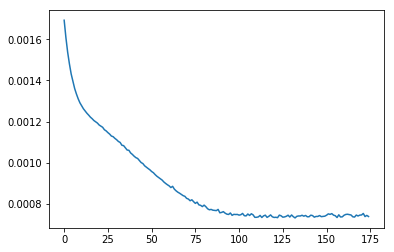

In [41]:
plt.plot(model_2d.history.history['loss'][25:])

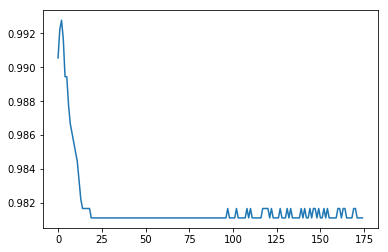

In [42]:
plt.plot(model_2d.history.history['acc'][25:])